In [ ]:
!pip install tensorflow keras opencv-python

In [ ]:
import keras
import tensorflow as tf

In [ ]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL_Course/Iris.csv").values
# dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL_Course/Iris.csv", header=None).values
data=dataset[:,1:5]
target=dataset[:,5]

In [ ]:
print(dataset[0:5,:])
print(data[0:5,:])
print(target[0:5])

[[1 5.1 3.5 1.4 0.2 'Iris-setosa']
 [2 4.9 3.0 1.4 0.2 'Iris-setosa']
 [3 4.7 3.2 1.3 0.2 'Iris-setosa']
 [4 4.6 3.1 1.5 0.2 'Iris-setosa']
 [5 5.0 3.6 1.4 0.2 'Iris-setosa']]
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [ ]:
# Define a mapping dictionary
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# Convert class labels to numerical values
target = [class_mapping[label] for label in target]
print(target[0:5])

[0, 0, 0, 0, 0]


In [ ]:
from keras.utils import to_categorical
new_target=to_categorical(target)
print(new_target[0:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense # Feed forwrod / fully connected layers

model=Sequential() #empty NN Object
model.add(Dense(32,input_dim=4, activation='relu')) # 1st NDN Layer
model.add(Dense(64,activation='relu')) # 2nd HDN Layer
model.add(Dense(16,activation='relu')) # 3rd HDN Layer
model.add(Dense(3,activation='softmax')) #output

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                160       
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dense_22 (Dense)            (None, 16)                1040      
                                                                 
 dense_23 (Dense)            (None, 3)                 51        
                                                                 
Total params: 3363 (13.14 KB)
Trainable params: 3363 (13.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
print(len(data))
print(len(train_data))
print(len(test_data))

print(len(new_target))
print(len(train_target))
print(len(test_target))

150
135
15
150
135
15


In [ ]:
print(type(data))
print(type(train_data))
print(type(test_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
import numpy as np

In [ ]:
train_data=tf.convert_to_tensor(train_data)
train_target=tf.convert_to_tensor(train_target)
test_data=tf.convert_to_tensor(test_data)
test_target=tf.convert_to_tensor(test_target)

In [ ]:
print(type(data))
print(type(train_data))
print(type(test_data))

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
print(train_data[0:5])

tf.Tensor(
[[6.4 3.2 5.3 2.3]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.6 1.4]
 [4.9 3.1 1.5 0.1]
 [6.7 3.1 5.6 2.4]], shape=(5, 4), dtype=float32)


In [ ]:
# history=model.fit(train_data,train_target,epochs=100, batch_size=4)
# history=model.fit(train_data,train_target,epochs=100, batch_size=4,validation_data=(test_data,test_target))
history=model.fit(data,new_target,epochs=100, batch_size=4,validation_split=0.2)

Epoch 1/100
34/34 [==============================] - 0s 8ms/step - loss: 0.7833 - accuracy: 0.6963 - val_loss: 0.7869 - val_accuracy: 0.4000
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.8074 - val_loss: 0.6311 - val_accuracy: 0.8000
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.8370 - val_loss: 0.5472 - val_accuracy: 0.8667
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.9333 - val_loss: 0.3805 - val_accuracy: 0.8667
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8815 - val_loss: 0.3308 - val_accuracy: 0.9333
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.9704 - val_loss: 0.3889 - val_accuracy: 0.8667
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.8963 - val_loss: 0.2855 - val_accuracy: 0.9333
Epoch 8/100
3

Evaluating the Algorithm

In [ ]:
history.history['accuracy']

[0.6962962746620178,
 0.8074073791503906,
 0.8370370268821716,
 0.9333333373069763,
 0.8814814686775208,
 0.970370352268219,
 0.8962963223457336,
 0.970370352268219,
 0.9185185432434082,
 0.9629629850387573,
 0.9629629850387573,
 0.9777777791023254,
 0.9629629850387573,
 0.9629629850387573,
 0.9777777791023254,
 0.9851852059364319,
 0.9407407641410828,
 0.9407407641410828,
 0.970370352268219,
 0.9851852059364319,
 0.9629629850387573,
 0.9777777791023254,
 0.9777777791023254,
 0.970370352268219,
 0.9851852059364319,
 0.9925925731658936,
 0.9481481313705444,
 0.9851852059364319,
 0.9777777791023254,
 0.9777777791023254,
 0.9481481313705444,
 0.9851852059364319,
 0.970370352268219,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.970370352268219,
 0.970370352268219,
 0.9555555582046509,
 0.970370352268219,
 0.9851852059364319,
 0.9777777791023254,
 0.9777777791023254,
 0.970370352268219,
 0.9851852059364319,
 0.970370352268219,
 0.9629629850387573,
 0.9851852059364319,
 0

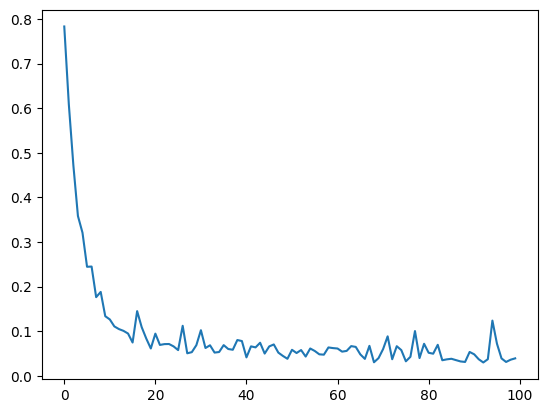

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])

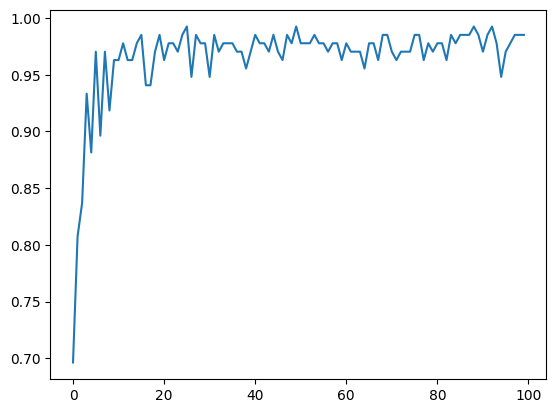

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
test_data = tf.convert_to_tensor(test_data)
print(test_data.dtype)

<dtype: 'float32'>


In [ ]:
predicted_target=model.predict(test_data)

1/1 [==============================] - 0s 184ms/step


In [ ]:
print('Actual results: ', test_target)
print('Predicted results: ', predicted_target)

Actual results:  tf.Tensor(
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(15, 3), dtype=float32)
Predicted results:  [[9.99991715e-01 7.58355418e-06 5.78762297e-07]
 [2.39969631e-06 3.95515328e-03 9.96042430e-01]
 [1.68425220e-04 9.99794483e-01 3.70595189e-05]
 [5.08202720e-06 1.49462568e-02 9.85048532e-01]
 [2.14410597e-04 9.99656558e-01 1.29082327e-04]
 [9.05822526e-05 9.99860287e-01 4.90729981e-05]
 [6.94588743e-05 9.99874115e-01 5.63927606e-05]
 [1.85197583e-04 9.99727607e-01 8.72701639e-05]
 [1.15876326e-04 9.81724262e-01 1.81599110e-02]
 [1.27684281e-04 9.99265969e-01 6.06327318e-04]
 [6.58394993e-06 6.84134960e-02 9.31579947e-01]
 [9.99979138e-01 1.91362760e-05 1.67722612e-06]
 [1.49158484e-04 9.99755800e-01 9.50316899e-05]
 [2.81021203e-05 6.66310787e-02 9.33340847e-01]
 [1.83754128e-06 5.79339918e-03 9.94204819e-01]]


In [ ]:
test_labels=np.argmax(test_target, axis=1)
predicted_labels=np.argmax(predicted_target, axis=1)
print('Actual results: ', test_labels)
print('Predicted results: ', predicted_labels)

Actual results:  [0 2 1 2 1 1 1 1 1 1 2 0 1 1 2]
Predicted results:  [0 2 1 2 1 1 1 1 1 1 2 0 1 2 2]


In [ ]:
from sklearn.metrics import accuracy_score
valid_acc=accuracy_score(test_labels,predicted_labels)
print(valid_acc)

0.9333333333333333


Text(0, 0.5, 'loss')

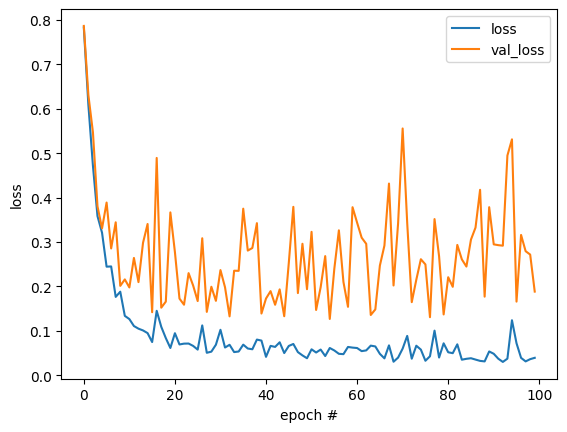

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.xlabel('epoch #')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

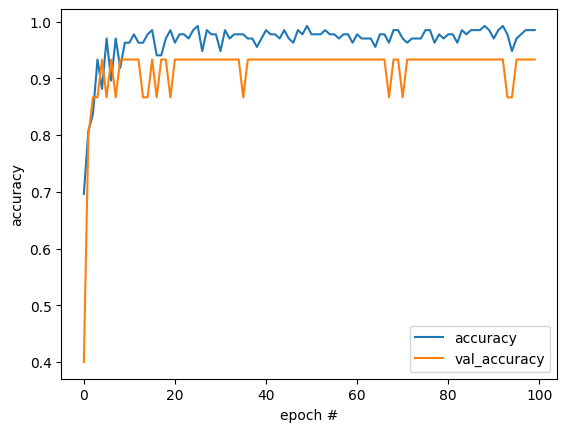

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

plt.xlabel('epoch #')
plt.ylabel('accuracy')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/iris-model-v01.model')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/iris-model-v01.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

model=load_model('/content/drive/MyDrive/Colab Notebooks/DL_Course/iris-model-v01.h5')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                160       
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dense_22 (Dense)            (None, 16)                1040      
                                                                 
 dense_23 (Dense)            (None, 3)                 51        
                                                                 
Total params: 3363 (13.14 KB)
Trainable params: 3363 (13.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_data=[0.2,1.5,1.4,0.6]
test_data=np.array(test_data)

In [ ]:
test_data.shape

(4,)

In [ ]:
test_data=test_data.reshape(1,-1)
#test_data=test_data.reshape(-1,1)

In [ ]:
test_data.shape

(1, 4)

In [ ]:
predicted_target=model.predict(test_data)

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(predicted_target)

[[0.17299952 0.7704408  0.05655968]]


In [ ]:
predicted_label=np.argmax(predicted_target,axis=1)

In [ ]:
predicted_label

array([1])

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/DL_Course/iris-model-weights-v01.h5')

In [ ]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/DL_Course/iris-model-weights-v01.h5')

In [21]:
import numpy as np
from pydantic import BaseModel
from tensorflow.keras.models import load_model

# Class mapping
class_mapping = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# load model
model=load_model('/content/drive/MyDrive/Colab Notebooks/DL_Course/iris-model-v01.h5')

class Flower(BaseModel):
  sepal_length:float
  sepal_width:float
  petal_length:float
  petal_width:float

def predict(data:Flower):
  # Convert input data to numpy array
  input_data=np.array([data.sepal_length,data.sepal_width,data.petal_length, data.petal_width])
  # Reshape
  input_data=input_data.reshape(1,-1)
  # Predict
  predicted_target=model.predict(input_data)
  # Get the index of the maximum value
  max_index = np.argmax(predicted_target)
  # Get the relevant class
  relevant_class = class_mapping[max_index]
  print("Predicted class:", relevant_class)
  return relevant_class

In [22]:
input_data=Flower(sepal_length=0.2,sepal_width=1.5,petal_length=1.4,petal_width=0.6)
predict(input_data)

1/1 [==============================] - 0s 97ms/step
Predicted class: Iris-versicolor


'Iris-versicolor'